# Graph Visualizer For Algorithms using CSV File

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_FCFS_SJF_Comparison.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

print(dataset)


          name  #cases  avgTAT  avgWT  nCS
0  mDRRHA-fcfs       8    27.0    5.5   29
1   mDRRHA-sjf       8    20.0    4.5   20
2  mDRRHA-fcfs      10    27.0    5.5   29
3   mDRRHA-sjf      10    20.0    4.5   20
4  mDRRHA-fcfs       7    27.0    5.5   29
5   mDRRHA-sjf       7    20.0    4.5   20
6  mDRRHA-fcfs       7    27.0    5.5   29
7   mDRRHA-sjf       7    20.0    4.5   20
8  mDRRHA-fcfs       7    27.0    5.5   29
9   mDRRHA-sjf       7    20.0    4.5   20


In [3]:
MDRRHA_SJS_FCFS = 0
ALGO_COMPARISONS_ATAT_BAR = 1
ALGO_COMPARISONS_ATAT_LINE = 2
ALGO_COMPARISONS_WT_BAR = 3
ALGO_COMPARISONS_WT_LINE = 4

<Figure size 432x288 with 0 Axes>

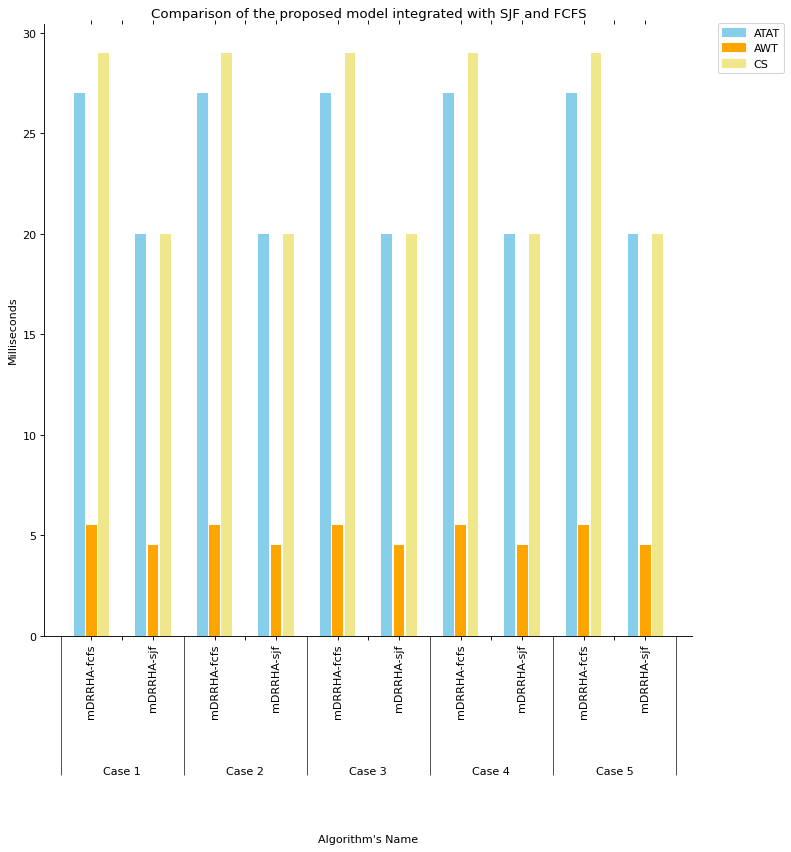

In [4]:
# Comparison of mDRRHA with SJF and FCFS

# Graph Configurations 
plt.figure(MDRRHA_SJS_FCFS)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['name'].to_numpy()
X_labels = []
X_axis = []
X_axis_lines = [0]
X_axis_bars = []

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    X_axis_bars.append(counter)

    counter += 1
    if push_empty:
        push_empty = False
        X_axis_lines.append(counter)
        counter += 1

    if i % 2 == 0:
        X_labels = np.append(X_labels, 'Case ' + str(current_case_index))
        current_case_index += 1
        X_axis.append(counter)
        counter += 1
        push_empty = True

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# vertical alignment of xtick labels
minor_axis_padding_up = -0.2
vertical_align = []
for i in range(0, len(X_labels)):
    valueToPush = 0
    if i % 3 == 1:
        valueToPush = minor_axis_padding_up      

    vertical_align.append(valueToPush)

# Adding Lines to xTicks
line_width = 0.025
line_height = 125

for i, (t, y) in enumerate(zip(ax.get_xticklabels(), vertical_align)):
    if i % 3 == 0 or i % 3 == 2:
        t.set_rotation(90)

    t.set_y(y)


ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

bar_width = 0.35
padding_betweenbars = 0.05

avgTAT_color = 'skyblue'
avgWT_color = 'orange'
nCS_color = 'khaki'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis_bars):
    ax.bar(
        x_axis - bar_width - padding_betweenbars, 
        dataset['avgTAT'][current_bar_index], 
        bar_width, 
        label = 'ATAT',
        color = avgTAT_color
    )

    ax.bar(
        x_axis, 
        dataset['avgWT'][current_bar_index], 
        bar_width, 
        label = 'AWT',
        color = avgWT_color
    )

    ax.bar(
        x_axis + bar_width + padding_betweenbars, 
        dataset['nCS'][current_bar_index], 
        bar_width, 
        label = 'CS',
        color = nCS_color
    )

    current_bar_index += 1

# Configuring Legend
legend_elements = [
    Patch(facecolor=avgTAT_color, edgecolor=avgTAT_color, label='ATAT'),
    Patch(facecolor=avgWT_color, edgecolor=avgWT_color, label='AWT'),
    Patch(facecolor=nCS_color, edgecolor=nCS_color, label='CS')
]

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.15, 1.01)
)

plt.xlabel('Algorithm\'s Name', labelpad = 50)
plt.ylabel('Milliseconds')
plt.title('Comparison of the proposed model integrated with SJF and FCFS')
# plt.legend()
plt.show()


In [27]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_output.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

dataset = dataset.sort_values(by = ['#cases', 'name'])


In [28]:
print(dataset)

     name  #cases        avgTAT         avgWT         avgRT   nCS
2   DRRHA      10    714.599976    563.400024    264.100006    33
1      RR      10    935.299988    784.099976     32.700001   156
0     SJF      10    536.200012    385.000000    385.000000     9
5   DRRHA      50   4437.560059   4255.200195   2160.120117   139
4      RR      50   6204.680176   6022.319824    232.479996   933
3     SJF      50   3276.320068   3093.959961   3093.959961    49
8   DRRHA     100   9901.629883   9700.190430   4585.370117   300
7      RR     100  13591.790039  13390.349609    485.339996  2055
6     SJF     100   6930.910156   6729.470215   6729.470215    99
11  DRRHA     150  15610.953125  15407.946289   6758.826660   457
10     RR     150  20963.439453  20760.433594    739.580017  3106
9     SJF     150  10625.740234  10422.733398  10422.733398   149
14  DRRHA     200  20853.500000  20649.699219   8923.330078   617
13     RR     200  27874.125000  27670.324219    989.655029  4161
12    SJF 

<Figure size 432x288 with 0 Axes>

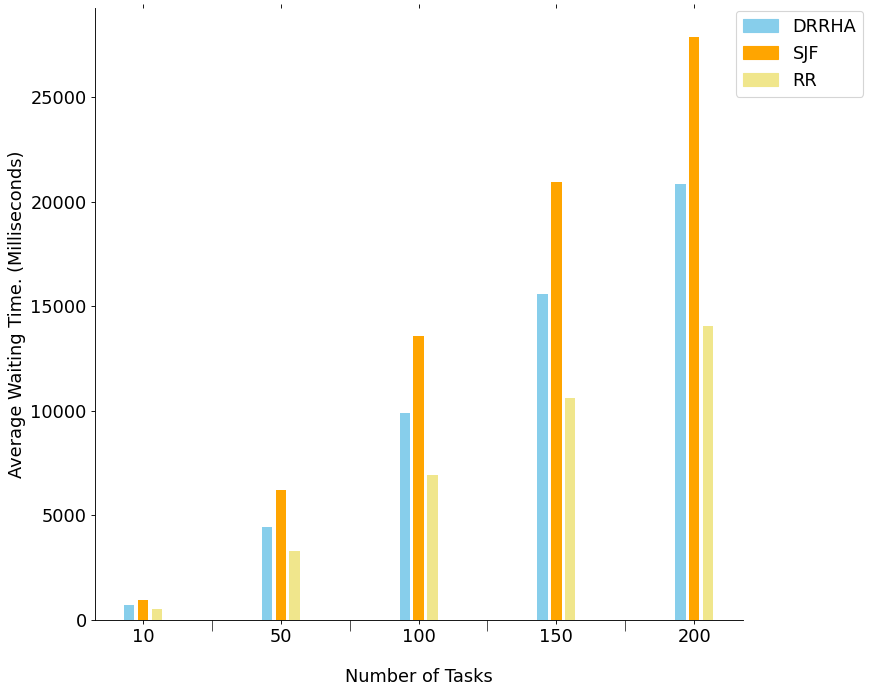

In [32]:
# Comparison of Algos Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_BAR)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

colors = [
    'skyblue', 'DRRHA',
    'orange', 'SJF',
    'khaki', 'RR'
    # 'red', 'MDRRHA'
]

bar_width = 0.15
paddings = [
    -bar_width - 0.05, 
    0, 
    bar_width + 0.05, 
    2 * bar_width + 0.10
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_value_index = 0
num_algos = len(dataset['name'].unique())
# average_WT_values = dataset['avgRT'].to_numpy()     # To Plot Average Waiting Times
# average_WT_values = dataset['avgWT'].to_numpy()     # To Plot Average Waiting Times
average_WT_values = dataset['avgTAT'].to_numpy()       # To Plot Average Turn around times


for index, x_axis in enumerate(X_axis):
    for i in range(0, num_algos):
        ax.bar(
            x_axis + paddings[i], 
            average_WT_values[current_value_index], 
            bar_width, 
            color = colors[2 * i]
        )

        current_value_index += 1

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Tasks', labelpad = 20)

plt.ylabel('Average Waiting Time. (Milliseconds)')
# plt.ylabel('Average Turnaround Time. (Milliseconds)')

# plt.title('Evalulation of the average Waiting time.')
# plt.title('Evalulation of the average turnaround time.')
plt.show()


In [8]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_output.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

# dataset = dataset.loc[dataset['name'].isin(['SJF', 'DRRHA'])]

sjf_values = dataset.loc[dataset['name'] == 'SJF']
drrha_values = dataset.loc[dataset['name'] == 'DRRHA']
mdrrha_values = dataset.loc[dataset['name'] == 'MDRRHA']

dataset = dataset.sort_values(by = ['#cases', 'name'])

# print(sjf_values)
# print(drrha_values)
# print(mdrrha_values)

<Figure size 432x288 with 0 Axes>

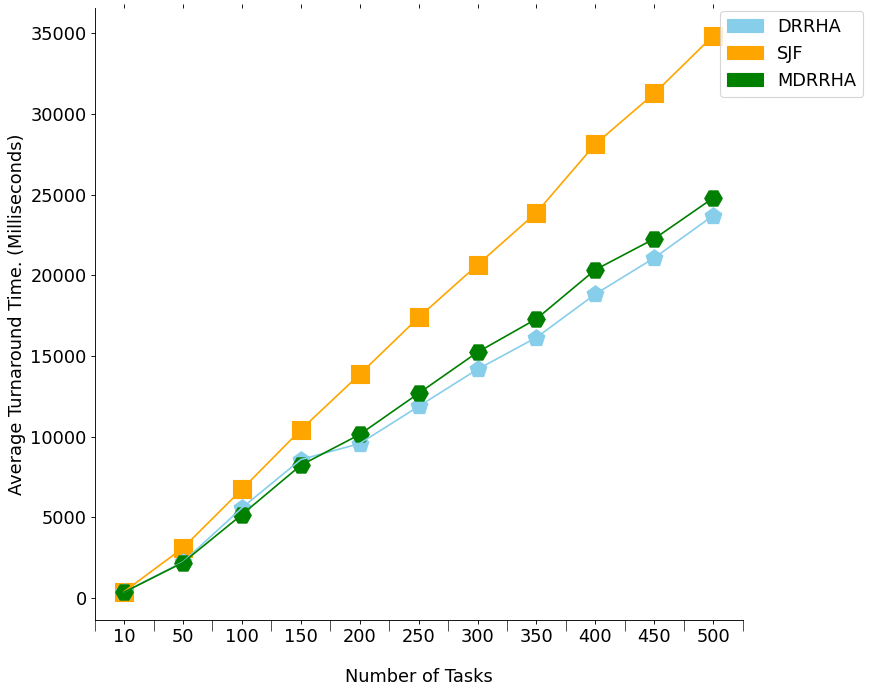

In [12]:
# Line Graph Comparison of DRRHA and STF Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_LINE)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

colors = [
    'skyblue', 'DRRHA',
    'orange', 'SJF',
    'green', 'MDRRHA'
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
marker_size = 250

# plot_metric = 'avgWT'
# plot_metric = 'avgTAT'
plot_metric = 'avgRT'

ax.plot(X_axis, sjf_values[plot_metric].to_numpy(), color = colors[2])
plt.scatter(X_axis, sjf_values[plot_metric].to_numpy(), marker = 's', s = marker_size, color = colors[2])

ax.plot(X_axis, drrha_values[plot_metric].to_numpy(), color = colors[0])
plt.scatter(X_axis, drrha_values[plot_metric].to_numpy(), marker = 'p', s = marker_size, color = colors[0])

ax.plot(X_axis, mdrrha_values[plot_metric].to_numpy(), color = colors[4])
plt.scatter(X_axis, mdrrha_values[plot_metric].to_numpy(), marker = 'H', s = marker_size, color = colors[4])

# ax.plot(X_axis, ndrrha_values[plot_metric].to_numpy(), color = colors[6])
# plt.scatter(X_axis, ndrrha_values[plot_metric].to_numpy(), marker = 'h', s = marker_size, color = colors[6])

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Tasks', labelpad = 20)
# plt.ylabel('Average Waiting Time. (Milliseconds)')
plt.ylabel('Average Turnaround Time. (Milliseconds)')
# plt.title('Comparison of the average Waiting time of SJF and DRRHA.')
plt.show()